## Objective - Create entanglement between two qubits

In [1]:
# qiskit imports:
from qiskit import QuantumCircuit, assemble, Aer, execute, __qiskit_version__
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector, plot_state_qsphere
from qiskit_textbook.tools import array_to_latex
from qiskit.providers.ibmq import least_busy
from qiskit.tools import job_monitor

# other imports:
from math import sqrt, pi
import numpy as np

qasm_simulator = Aer.get_backend('qasm_simulator')
sv_simulator = Aer.get_backend('statevector_simulator')
unitary_simulator = Aer.get_backend('unitary_simulator')

print(__qiskit_version__)

{'qiskit-terra': '0.19.1', 'qiskit-aer': '0.10.1', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.18.3', 'qiskit-aqua': None, 'qiskit': '0.34.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}


#### Create circuit

In [2]:
qc = QuantumCircuit(2)    # Quantum circuit with 2 qubits and 2 bits
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

qobj = assemble(qc)

qc.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

#### get the statevector

In [3]:
qc_2 = QuantumCircuit(2)    # Quantum circuit with 2 qubits and 2 bits
qc_2.h(0)
qc_2.cx(0, 1)

qobj_2 = assemble(qc_2)

# NOTE: qc.measure_all() is not included bc it will mess up the probability vector.

sv_sim = Aer.get_backend('statevector_simulator')
state = sv_sim.run(qobj_2).result().get_statevector()

# Show result of sim.
array_to_latex(state, pretext="\\text{Probabilitiy Vector = }")

<IPython.core.display.Math object>

#### simulate circuit

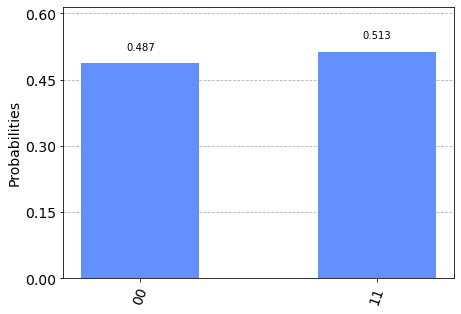

In [4]:
simulator = Aer.get_backend('qasm_simulator')

job = execute(qc, simulator, shots=1000)

results = job.result()
counts = results.get_counts()

plot_histogram(counts)


#### Check on bloch sphere

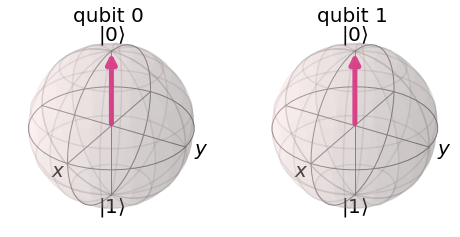

In [5]:
simulator = Aer.get_backend('statevector_simulator')

job = simulator.run(qobj)
statevector = job.result().get_statevector()

plot_bloch_multivector(statevector)